<a href="https://colab.research.google.com/github/Abhinav2001com/ML-1/blob/main/Ensemble_ML(2)_31_01_25(mushroom)(AF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **abbreviations used **
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [2]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Mushroom_data=pd.read_csv('/content/drive/MyDrive/DATA_files/mushrooms.csv')

In [5]:
Mushroom_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
Mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
Mushroom_data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [8]:
Mushroom_data.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

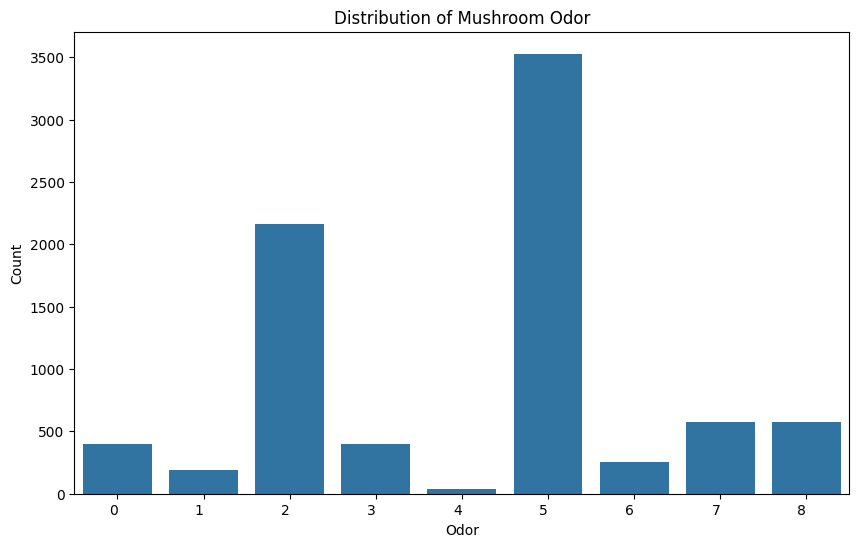

In [26]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.countplot(x='odor', data=Mushroom_data)
plt.title('Distribution of Mushroom Odor')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels if needed
plt.show()

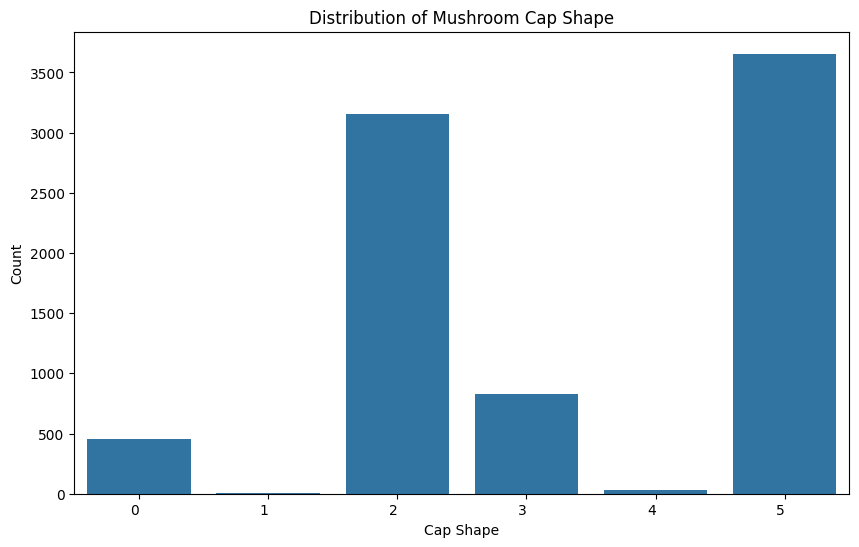

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cap-shape', data=Mushroom_data)
plt.title('Distribution of Mushroom Cap Shape')
plt.xlabel('Cap Shape')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels if needed
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

def label_encode(data, columns):
    encoders = {}
    for col in columns:
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])
        encoders[col] = encoder
    return data

In [10]:
Mushroom_data.dtypes

,0
class,object
cap-shape,object
cap-surface,object
cap-color,object
bruises,object
odor,object
gill-attachment,object
gill-spacing,object
gill-size,object
gill-color,object


In [11]:
Mushroom_data_cols =['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat','class']

In [12]:
Mushroom_data= label_encode(Mushroom_data,Mushroom_data_cols)

In [13]:
Mushroom_data.dtypes

,0
class,int64
cap-shape,int64
cap-surface,int64
cap-color,int64
bruises,int64
odor,int64
gill-attachment,int64
gill-spacing,int64
gill-size,int64
gill-color,int64


In [14]:
x=Mushroom_data.drop('class',axis=1)
y=Mushroom_data['class']

In [15]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [16]:
y

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [18]:
x_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7614,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
3016,5,0,3,0,2,1,0,0,2,0,...,1,6,4,0,2,1,2,1,4,1
5485,2,3,3,0,2,1,0,0,7,0,...,1,6,4,0,2,1,2,1,4,4
2080,5,0,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,3,1
4173,2,0,9,0,2,1,0,0,2,0,...,1,0,0,0,2,1,2,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,5,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,4,1
5704,3,3,2,1,5,1,0,0,10,0,...,2,2,7,0,2,2,0,7,1,6
6637,2,2,2,0,8,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,0
2575,5,3,4,1,5,1,0,0,5,1,...,2,7,7,0,2,1,4,2,5,0


In [19]:
y_train

,class
7614,1
3016,1
5485,1
2080,0
4173,1
...,...
3606,1
5704,0
6637,1
2575,0


In [20]:
rf=RandomForestClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
ad=AdaBoostClassifier(random_state=1)

models=[rf,gb,ad]
accuracy_score_os=[]

RandomForestClassifier(random_state=1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       765

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
GradientBoostingClassifier(random_state=1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       765

    accuracy              

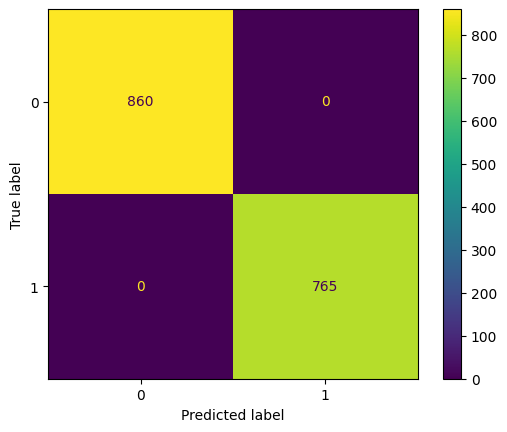

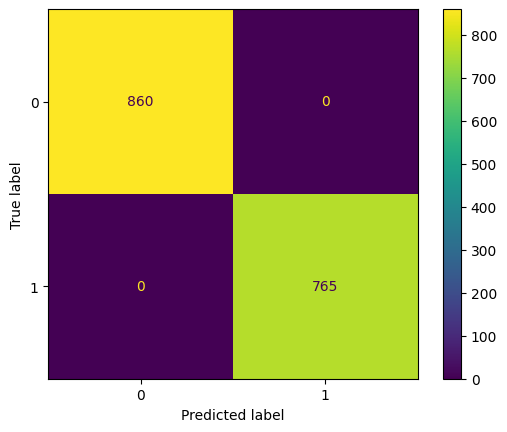

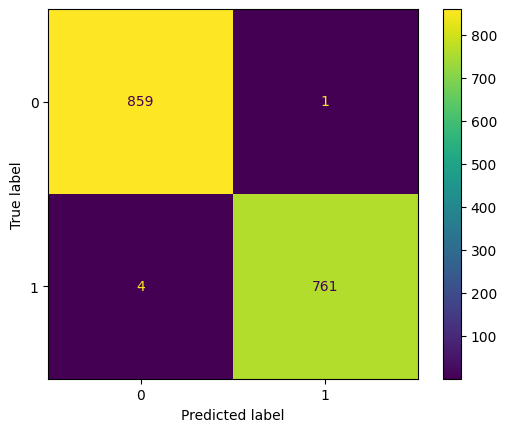

In [21]:
for select in models:
  print(select)
  select.fit(x_train,y_train)
  test_prediction=select.predict(x_test)
  test_prediction
  print(classification_report(y_test,test_prediction))
  print(ConfusionMatrixDisplay.from_predictions(y_test,test_prediction))
  accuracy=accuracy_score(y_test,test_prediction)
  accuracy_score_os.append(accuracy)
  print('--'*200)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       860
           1       0.92      0.93      0.93       765

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625

0.9298461538461539


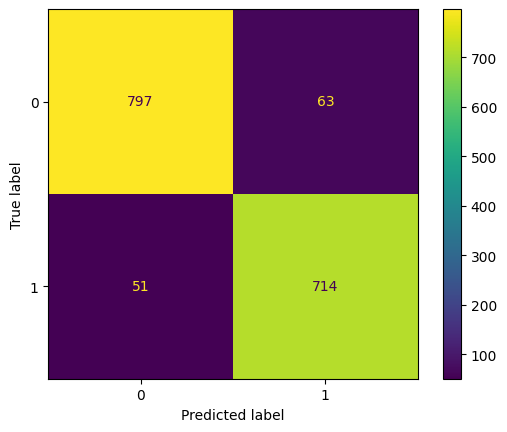

In [22]:
from sklearn.naive_bayes import GaussianNB
base=GaussianNB()
ad=AdaBoostClassifier(estimator=base)
ad.fit(x_train,y_train)
test_pred=ad.predict(x_test)
print(classification_report(y_test,test_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,test_pred))
print(accuracy_score(y_test,test_pred))

In [23]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
estimator_list=[('rf',rf),('gb',gb),('ad',ad)]
st=StackingClassifier(estimators=estimator_list)
st.fit(x_train,y_train)


StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=1)),
                               ('gb',
                                GradientBoostingClassifier(random_state=1)),
                               ('ad',
                                AdaBoostClassifier(estimator=GaussianNB()))])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       765

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



1.0

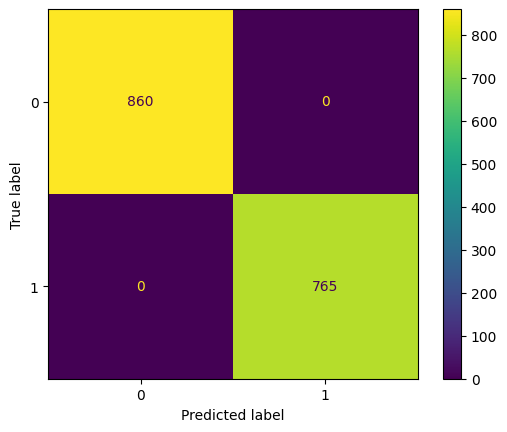

In [24]:
test_pred=st.predict(x_test)
test_pred
print(classification_report(y_test,test_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,test_pred))
accuracy_sc=accuracy_score(y_test,test_pred)
accuracy_sc